In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings

In [3]:
df = pd.read_csv('C:/Users/rishp/OneDrive/Documents/GitHub/DataWranglingCapstone/cleaneddf.csv')

In [4]:
df.head()

,state,date,cases,deaths,Hospital inpatient beds available,"ICU bed occupancy, estimate"
0,Alabama,2020-04-15,4241,123,7149,1474
1,Alabama,2020-04-16,4404,137,6635,1458
2,Alabama,2020-04-17,4572,151,6728,1460
3,Alabama,2020-04-18,4723,147,7077,1506
4,Alabama,2020-04-19,4903,160,6685,1347


In [5]:
df.dtypes

state                                object
date                                 object
cases                                 int64
deaths                                int64
Hospital inpatient beds available     int64
ICU bed occupancy, estimate           int64
dtype: object

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.dtypes

state                                        object
date                                 datetime64[ns]
cases                                         int64
deaths                                        int64
Hospital inpatient beds available             int64
ICU bed occupancy, estimate                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   state                              4836 non-null   object        
 1   date                               4836 non-null   datetime64[ns]
 2   cases                              4836 non-null   int64         
 3   deaths                             4836 non-null   int64         
 4   Hospital inpatient beds available  4836 non-null   int64         
 5   ICU bed occupancy, estimate        4836 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 226.8+ KB


In [9]:
state_summary = df.set_index('state')

In [10]:
state_summary.deaths.sort_values(ascending=False).head()

state
New Jersey    15281
New Jersey    15229
New Jersey    15211
New Jersey    15189
New Jersey    15164
Name: deaths, dtype: int64

In [11]:
state_summary.cases.sort_values(ascending=False).head()

state
California    287766
California    277869
California    271587
California    265176
California    256298
Name: cases, dtype: int64

In [12]:
state_summary['Hospital inpatient beds available'].sort_values(ascending=False).head()

state
California    39293
California    39127
California    37092
Texas         36980
California    36827
Name: Hospital inpatient beds available, dtype: int64

In [13]:
state_summary['ICU bed occupancy, estimate'].sort_values(ascending=False).head()

state
California    8617
Texas         8550
California    8269
California    8261
California    8251
Name: ICU bed occupancy, estimate, dtype: int64

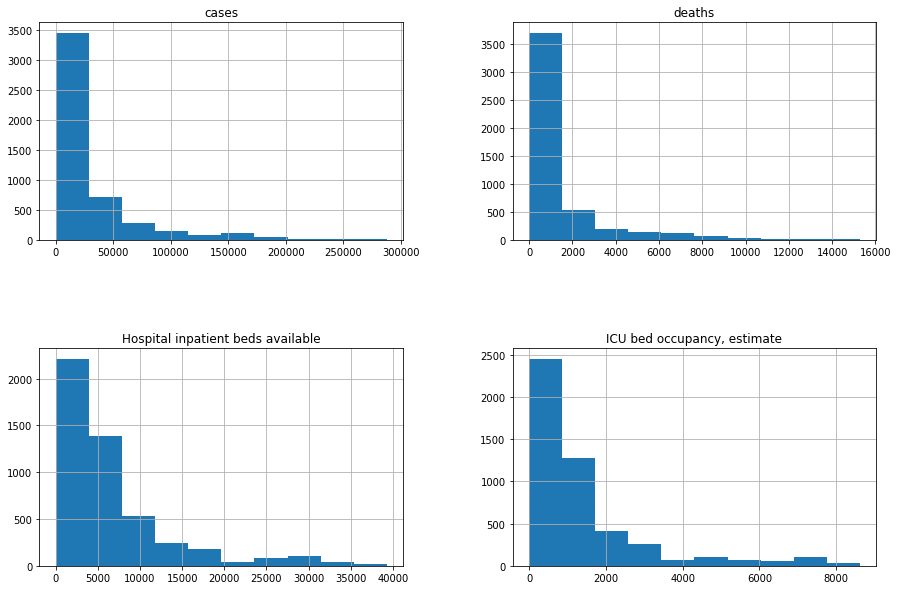

In [14]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [15]:
df.corr()

,cases,deaths,Hospital inpatient beds available,"ICU bed occupancy, estimate"
cases,1.000000,0.892956,0.505795,0.660641
deaths,0.892956,1.000000,0.352232,0.447974
Hospital inpatient beds available,0.505795,0.352232,1.000000,0.909969
"ICU bed occupancy, estimate",0.660641,0.447974,0.909969,1.000000


<AxesSubplot:>

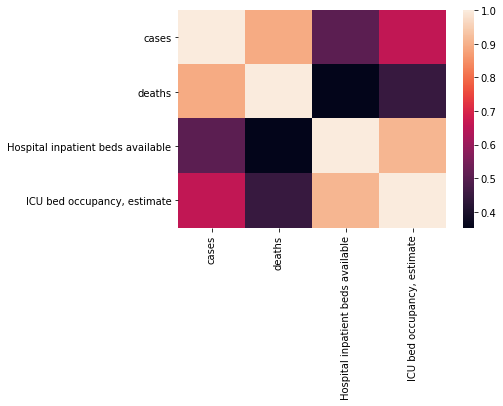

In [20]:
sns.heatmap(df.corr())

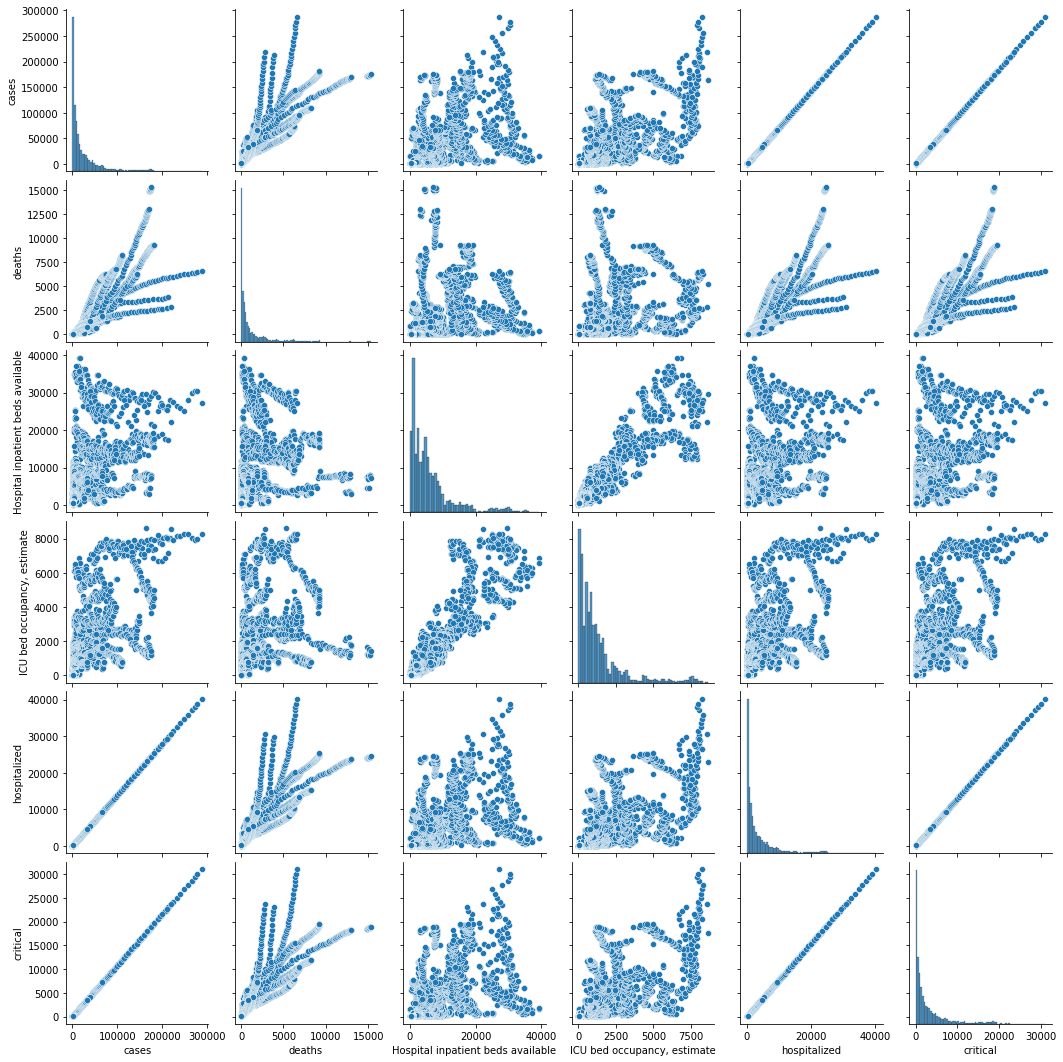

In [36]:
sns.pairplot(df)

In [22]:
# During the time period of the data, the CDC mentioned that 14% of all cases were hospitalized and 10.8% of all cases resulted
# in the death of the patient. We would like to see if the hospitals had enough beds and the ICU had enough occupancy to house 
# the critical patients

In [23]:
df['hospitalized'] = 0.14 * df['cases']

In [24]:
df['critical'] = .108 * df['cases']

In [25]:
df.head()

,state,date,cases,deaths,Hospital inpatient beds available,"ICU bed occupancy, estimate",hospitalized,critical
0,Alabama,2020-04-15,4241,123,7149,1474,593.74,458.028
1,Alabama,2020-04-16,4404,137,6635,1458,616.56,475.632
2,Alabama,2020-04-17,4572,151,6728,1460,640.08,493.776
3,Alabama,2020-04-18,4723,147,7077,1506,661.22,510.084
4,Alabama,2020-04-19,4903,160,6685,1347,686.42,529.524


In [26]:
# We will be testing if hospitalized > Hospital inpatient beds available and if critical > ICU bed Occupancy

<AxesSubplot:xlabel='Hospital inpatient beds available', ylabel='hospitalized'>

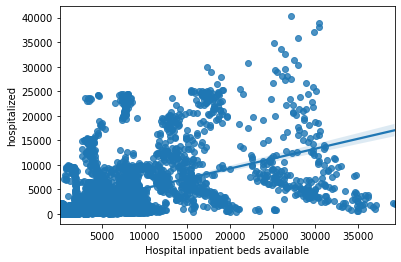

In [37]:
sns.regplot(x="Hospital inpatient beds available", y="hospitalized", data=df)

In [38]:
# In the graph we see most cases where the beds available are greater than the amount we expect hospitalized however
# these beds would be necessary for other cases as well. Most of the time the hospitals had to create beds in order to house
# the influx of covid patients
# We will be creating a regression model to see if the change in Beds can be explained by the change in cases


In [42]:
X = df[["Hospital inpatient beds available"]] 
y = df[["hospitalized"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 123)

In [44]:
rModel = linear_model.LinearRegression(normalize= True)
rModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [45]:
print(rModel.score(X_train, y_train))

0.24321033871436626


In [46]:
y_pred = rModel.predict(X_test)

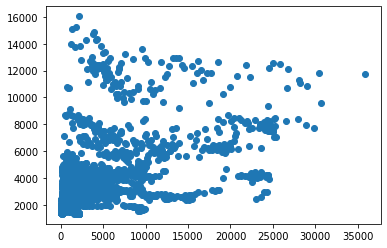

In [47]:
plt.scatter(y_test,y_pred)